In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'multi-cancer/Test_Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names
print(class_name)

Found 26000 files belonging to 26 classes.
['Acute Lymphoblastic Leukemia (ALL) - Benign Cases', 'Acute Lymphoblastic Leukemia (ALL) - Early Stage', 'Acute Lymphoblastic Leukemia (ALL) - Pre-Treatment', 'Acute Lymphoblastic Leukemia (ALL) - Progressed Cases', 'Brain Cancer - General Tumor', 'Brain Cancer - Glioma', 'Brain Cancer - Meningioma', 'Breast Cancer - Benign', 'Breast Cancer - Malignant', 'Cervical Cancer - Abnormal Pap Results', 'Cervical Cancer - Dyskaryosis', 'Cervical Cancer - Keratinized Cells', 'Cervical Cancer - Pre-Cancerous Cells', 'Cervical Cancer - Specific Forms', 'Kidney Cancer - Normal Tissue', 'Kidney Cancer - Tumor', 'Lung and Colon Cancer - Benign Colon Conditions', 'Lung and Colon Cancer - Benign Lung Conditions', 'Lung and Colon Cancer - Colon Adenocarcinoma', 'Lung and Colon Cancer - Lung Adenocarcinoma', 'Lung and Colon Cancer - Lung Squamous Cell Carcinoma', 'Lymphoma - Chronic Lymphocytic Leukemia', 'Lymphoma - Follicular Lymphoma', 'Lymphoma - Mantle Ce

In [3]:
cnn = tf.keras.models.load_model('cance_cnn.h5')

In [6]:
import cv2

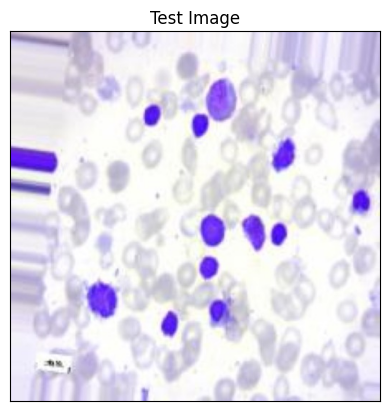

In [7]:
#Test Image Visualization
import cv2
image_path = r'multi-cancer\Test_Dataset\Acute Lymphoblastic Leukemia (ALL) - Benign Cases\all_benign_0003.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 6s 6s/step


In [9]:
print(predictions)

[[1.0000000e+00 2.0652315e-08 1.9453292e-09 6.3478493e-11 3.3656900e-18
  5.9726109e-18 3.1554713e-18 2.4413937e-14 8.8350666e-14 1.0491657e-10
  1.0497154e-15 4.8960859e-15 1.2905135e-13 1.0811129e-16 6.6582688e-21
  5.8030447e-19 1.0846015e-12 2.0548396e-11 3.0036034e-09 4.0241764e-12
  2.2439698e-15 2.0048610e-17 3.9062500e-18 5.4147799e-16 5.8829233e-13
  2.8873815e-12]]


In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


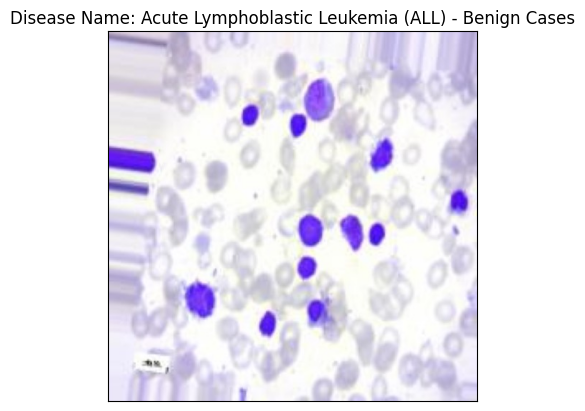

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()